# Prediction of leaderboard score (R)

In [1]:
score_data = read.csv('../input/scores.csv',stringsAsFactors=FALSE)
score_data[with(score_data, order(leaderboard_score)), ]

,model,leaderboard_score,accuracy,logloss,AUC,f1,mu,std
19,bagged_nolearn,0.4313,0.7813,7.5554,0.5857,0.3152,NA,NA
2,ensemble of averages,0.437,NA,NA,NA,NA,NA,NA
16,voting_ensemble_softWgtd,0.4396,0.7865,7.3755,0.6065,0.3692,0.76,0.0013
20,LogisticRegression,0.4411,0.7708,7.9152,0.554,0.2235,0.7601,0.0013
22,bagged_logit,0.4442,0.783,7.4954,0.5794,0.2938,0.76,0.0015
3,GradientBoostingClassifier,0.4452,0.7934,7.1356,0.6309,0.4251,0.7538,0.0047
21,LogisticRegressionCV,0.4457,0.783,7.4954,0.5794,0.2938,0.7602,0.0012
25,bagged_scikit_nn,0.4465,0.7986,6.9558,0.674,0.5085,0.7463,0.0065
17,bagged_gbc,0.4527,0.7899,7.2556,0.6137,0.3858,0.7573,0.0037
1,nolearn,0.4566,0.8056,6.7159,0.6711,0.5044,NA,NA


# Model using all variables

In [2]:
lm.fit = lm(leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std, 
            data      = score_data, 
            na.action = na.omit)

slm.fit = step(lm.fit, direction = "both")
summary(slm.fit)

Start:  AIC=-60.18
leaderboard_score ~ accuracy + logloss + AUC + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- AUC       1  0.000051 0.29209 -62.179
- f1        1  0.004574 0.29662 -61.902
- accuracy  1  0.022137 0.31418 -60.867
- logloss   1  0.022258 0.31430 -60.860
<none>                  0.29204 -60.182
- mu        1  0.107786 0.39983 -56.528
- std       1  0.254788 0.54683 -50.892

Step:  AIC=-62.18
leaderboard_score ~ accuracy + logloss + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- accuracy  1   0.02267 0.31476 -62.834
- logloss   1   0.02282 0.31492 -62.825
- f1        1   0.03171 0.32380 -62.324
<none>                  0.29209 -62.179
+ AUC       1   0.00005 0.29204 -60.182
- mu        1   0.15368 0.44577 -56.570
- std       1   0.32770 0.61980 -50.637

Step:  AIC=-62.83
leaderboard_score ~ logloss + f1 + mu + std

           Df Sum of Sq     RSS     AIC
- logloss   1   0.02081 0.33557 -63.681
- f1        1   0.02103 0.33579 -63.669
<none>              


Call:
lm(formula = leaderboard_score ~ mu + std, data = score_data, 
    na.action = na.omit)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18728 -0.05472 -0.03539  0.02082  0.42898 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   25.722      2.962   8.685 3.09e-07 ***
mu           -33.089      3.897  -8.490 4.11e-07 ***
std          -60.589      7.857  -7.711 1.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1499 on 15 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.8311,	Adjusted R-squared:  0.8086 
F-statistic: 36.91 on 2 and 15 DF,  p-value: 1.61e-06


# Plot Predicted Scores vs Actual Leaderboard Scores

In [3]:
predictions = c()
models = c()
scores = c()
for (i in 1:nrow(score_data)) {
    if (is.na(score_data[i,'std'])) {next}
    if (score_data[i,'model']=='RandomForestClassifier     ') {next} # a far outlier
    if (score_data[i,'model']=='KNeighborsClassifier       ') {next} # a far outlier
    
#     print(paste0("|",score_data[i,'model'],"|"))
    
    
    models = c(models, score_data[i,'model'])
    scores = c(scores, score_data[i,'leaderboard_score'])
    
    accuracy = score_data[i,'accuracy']
    logloss  = score_data[i,'logloss']
    AUC      = score_data[i,'AUC']
    f1       = score_data[i,'f1']
    mu       = score_data[i,'mu']
    std      = score_data[i,'std']
    predictions = c(predictions, round(predict(object=slm.fit,
                                 newdata  = data.frame(accuracy,logloss,AUC,f1,mu,std)),4))
}
pred_v_act = data.frame(models,scores,predictions)
pred_v_act

,models,scores,predictions
1,GradientBoostingClassifier,0.4452,0.4947
2,ExtraTreesClassifier,0.4729,0.4496
3,XGBClassifier,0.4851,0.5974
4,SGDClassifier,0.567,0.5662
5,AdaBoostClassifier,0.6642,0.4422
6,SVC,0.5336,0.6912
7,BaggingClassifier,0.4885,0.5201
8,voting_ensemble_hard,NA,0.4911
9,voting_ensemble_hardWgtd,NA,0.5016
10,voting_ensemble_softWgtd,0.4396,0.4955


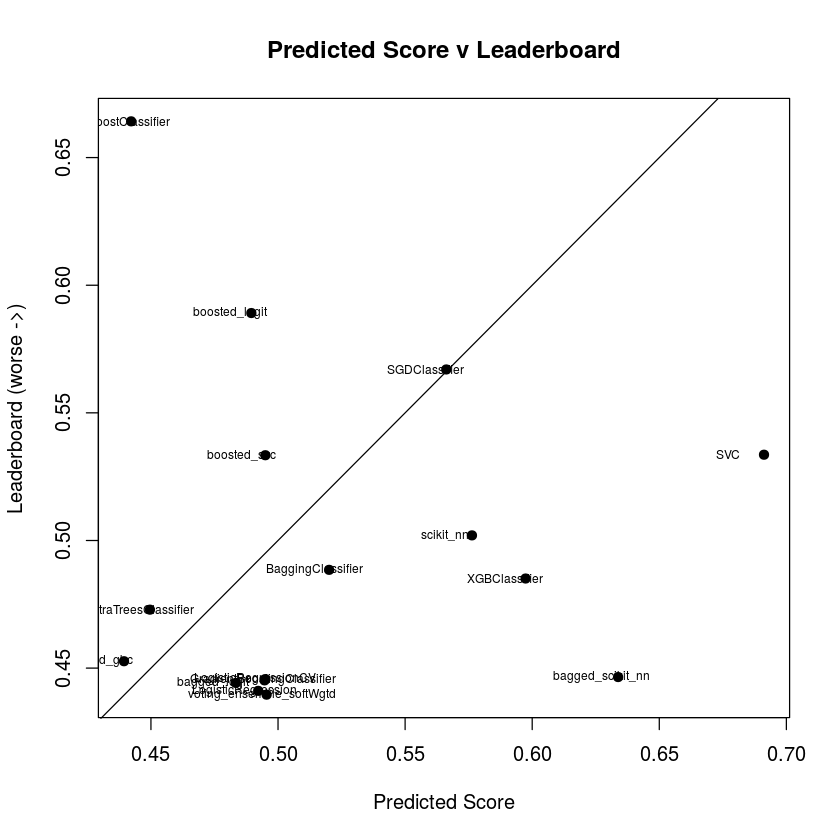

In [4]:
#par(pin=c(6,6))
library(car)
plot(pred_v_act[,'predictions'], pred_v_act[,'scores'], main="Predicted Score v Leaderboard", 
    ylab="Leaderboard (worse ->)", xlab="Predicted Score", pch=19)#, xlim=c(0.25,1.8),ylim=c(0.25,1.8))
text(pred_v_act[,'predictions'], pred_v_act[,'scores'], labels=models, cex= 0.6)
abline(coef=c(0,1))


In [5]:
score_data = score_data[with(score_data, order(leaderboard_score)), ]

library(knitr)
foo = kable(score_data, format = "markdown", digits = 4)
foof = ''
for (i in 1:length(foo)) {
    subs = substr(foo[i],5,52)
    foof = cat(foof,cat(subs,'\n'))
}
foof

|model                      | leaderboard_score| 
|:--------------------------|-----------------:| 
|bagged_nolearn             |            0.4313| 
|ensemble of averages       |            0.4370| 
|voting_ensemble_softWgtd   |            0.4396| 
|LogisticRegression         |            0.4411| 
|bagged_logit               |            0.4442| 
|GradientBoostingClassifier |            0.4452| 
|LogisticRegressionCV       |            0.4457| 
|bagged_scikit_nn           |            0.4465| 
|bagged_gbc                 |            0.4527| 
|nolearn                    |            0.4566| 
|ExtraTreesClassifier       |            0.4729| 
|blending_ensemble          |            0.4834| 
|XGBClassifier              |            0.4851| 
|BaggingClassifier          |            0.4885| 
|scikit_nn                  |            0.5020| 
|boosted_svc                |            0.5334| 
|SVC                        |            0.5336| 
|SGDClassifier              |            0.5670| 


NULL